In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
y_test.shape

(10000,)

In [5]:
img_rows, img_cols = 28, 28

if K.image_data_format()=='channel_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape = input_shape))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [8]:
history=model.fit(x_train, y_train, batch_size=128, epochs=12, validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 238s 504ms/step - loss: 0.2219 - accuracy: 0.9327 - val_loss: 0.0559 - val_accuracy: 0.9808
Epoch 2/12
469/469 [==============================] - 233s 497ms/step - loss: 0.0816 - accuracy: 0.9743 - val_loss: 0.0398 - val_accuracy: 0.9862
Epoch 3/12
469/469 [==============================] - 228s 487ms/step - loss: 0.0610 - accuracy: 0.9816 - val_loss: 0.0358 - val_accuracy: 0.9879
Epoch 4/12
469/469 [==============================] - 232s 494ms/step - loss: 0.0502 - accuracy: 0.9845 - val_loss: 0.0319 - val_accuracy: 0.9891
Epoch 5/12
469/469 [==============================] - 234s 498ms/step - loss: 0.0408 - accuracy: 0.9868 - val_loss: 0.0291 - val_accuracy: 0.9909
Epoch 6/12
469/469 [==============================] - 241s 514ms/step - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0.0279 - val_accuracy: 0.9907
Epoch 7/12
469/469 [==============================] - 229s 488ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0262 -

In [9]:
test_loss, test_acc= model.evaluate(x_test, y_test, verbose=2)
print('Accuracy', test_acc)

313/313 - 10s - loss: 0.0251 - accuracy: 0.9929 - 10s/epoch - 32ms/step
Accuracy 0.992900013923645


In [10]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)[:6]
label = np.argmax(y_test, axis=1)[:7]

print(pred)
print(label)

313/313 [==============================] - 11s 34ms/step
[7 2 1 0 4 1]
[7 2 1 0 4 1 4]


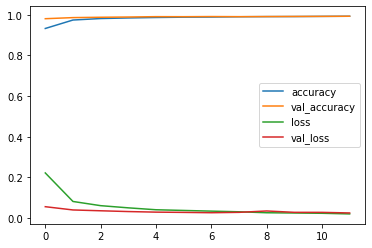

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()